<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/KNN_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Paper: Comparison of machine learning algorithm for Santander dataset  ###
###############################################################################
#### Integrantes  #############################################################
#### -
#### -
#### -
#### -
###############################################################################

## Paso 1: Importar los dateset enviados por el profesor
import pandas as pd
import numpy as np

# 1.1 Definir las rutas (al estar en la raíz de la carpeta 'Files', la ruta es directa)
train_path = '/content/train.csv'
test_path = '/content/test.csv'

# 1.2 Cargar los datos
# El paper menciona que trabajamos con 200,000 registros por archivo
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()
test_df.head()

print(f"¡Carga completada desde el almacenamiento local!")
print(f"Registros cargados: {len(train_df)}")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Paso 2: Pre - procesamiento de la información
# 2.1 Separación de variables predictoras (X) y objetivo (y)
# Basado en la estructura vista en head(), eliminamos ID y Target
X = train_df.drop(['ID_code', 'target'], axis=1)
y = train_df['target']

# 2.2 Normalización de Rango 0-1 (Exigencia del Paper y segun lo aprendido en clase)
scaler = MinMaxScaler(feature_range=(0, 1)) #escalador de datos
X_scaled = scaler.fit_transform(X) #Calcula los mínimos/máximos (fit) y escala los datos al rango 0-1 (transform) en un solo paso.

# Convertimos a DataFrame para mantener consistencia con las funciones de clase
X_final = pd.DataFrame(X_scaled, columns=X.columns)

# 2.3 División de datos para Validación (Rúbrica)
# Usamos un 20% para test y estratificamos para manejar el desbalance
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Datos listos para la Regresión Logística.")
print(f"Tamaño de entrenamiento: {X_train.shape}")
print(f"Tamaño de validación: {X_val.shape}")
print(f"Nuevo valor mínimo de var_0: {X_final['var_0'].min()}")
print(f"Nuevo valor máximo de var_0: {X_final['var_0'].max()}")

¡Carga completada desde el almacenamiento local!
Registros cargados: 200000
Datos listos para la Regresión Logística.
Tamaño de entrenamiento: (160000, 200)
Tamaño de validación: (40000, 200)
Nuevo valor mínimo de var_0: 0.0
Nuevo valor máximo de var_0: 0.9999999999999999


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# REDUCCIÓN DE MUESTRA (Crítico para que KNN termine en tiempo razonable)
# Tomamos 60,000 registros para entrenamiento y 20,000 para validación
X_train_sample = X_train.iloc[:60000]
y_train_sample = y_train.iloc[:60000]
X_val_sample = X_val.iloc[:20000]
y_val_sample = y_val.iloc[:20000]

# 3.1 Definir el modelo
# Usamos n_neighbors=8 como estándar, y n_jobs=-1 para usar todos los núcleos
model_knn = KNeighborsClassifier(n_neighbors=8, n_jobs=-1)

print("Iniciando entrenamiento de KNN (Muestra reducida)...")
model_knn.fit(X_train_sample, y_train_sample)

# 3.2 Predicciones
y_pred_knn = model_knn.predict(X_val_sample)
y_proba_knn = model_knn.predict_proba(X_val_sample)[:, 1]

# 3.3 Métricas
print("\n--- Reporte de Clasificación: KNN ---")
print(classification_report(y_val_sample, y_pred_knn))
auc_knn = roc_auc_score(y_val_sample, y_proba_knn)
print(f"AUC-ROC del KNN: {auc_knn:.4f}")

Iniciando entrenamiento de KNN (Muestra reducida)...

--- Reporte de Clasificación: KNN ---
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     17982
           1       0.00      0.00      0.00      2018

    accuracy                           0.90     20000
   macro avg       0.45      0.50      0.47     20000
weighted avg       0.81      0.90      0.85     20000

AUC-ROC del KNN: 0.5692


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


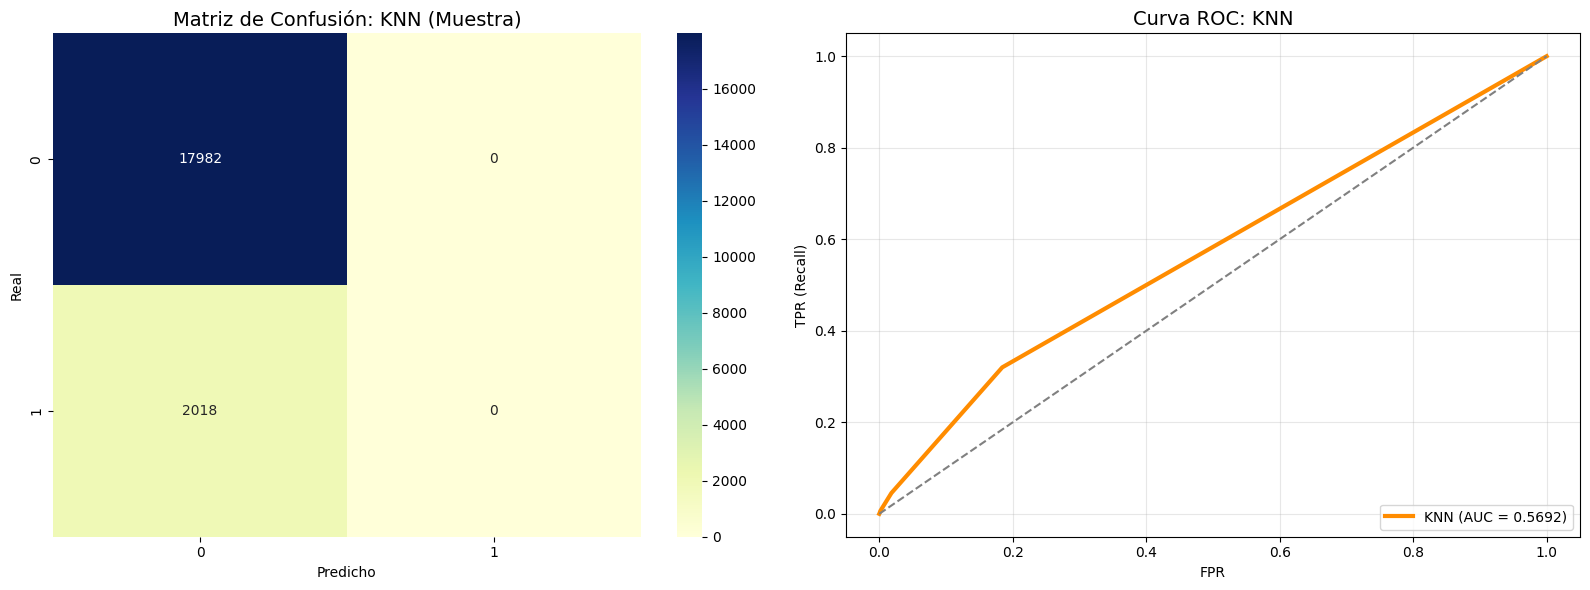

In [5]:

###############################################################################
#### Proyecto 1: Machine learning  ############################################
#### Modelo KNN                    ############################################
###############################################################################

from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configurar la visualización dual
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# A. Matriz de Confusión: El modelo se "rindió"
knn_cm = confusion_matrix(y_val_sample, y_pred_knn)
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax[0])
ax[0].set_title('Matriz de Confusión: KNN (Muestra)', fontsize=14)
ax[0].set_xlabel('Predicho')
ax[0].set_ylabel('Real')

# B. Curva ROC: Casi una línea diagonal (Azar)
fpr_knn, tpr_knn, _ = roc_curve(y_val_sample, y_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)
ax[1].plot(fpr_knn, tpr_knn, color='darkorange', lw=3, label=f'KNN (AUC = {roc_auc_knn:.4f})')
ax[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
ax[1].set_title('Curva ROC: KNN', fontsize=14)
ax[1].set_xlabel('FPR')
ax[1].set_ylabel('TPR (Recall)')
ax[1].legend(loc="lower right")
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()